# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_name=[]
lat=[]
lon=[]
maxtemp=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]

line = 0

print("Beginning Data Retrieval")
print("-----------------------------")


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {line} of Set 1 | {city}')
        
        line = line + 1
              
    except:
        print("City Not Found. Skipping...")
    continue
    
        

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | vardo
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | vasteras
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | ponta delgada
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | puerto carreno
Processing Record 8 of Set 1 | nyimba
Processing Record 9 of Set 1 | boa vista
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | grindavik
Processing Record 13 of Set 1 | bluff
City Not Found. Skipping...
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | kapaa
Processing Record 2

Processing Record 189 of Set 1 | mount gambier
Processing Record 190 of Set 1 | new norfolk
Processing Record 191 of Set 1 | coruripe
Processing Record 192 of Set 1 | caceres
Processing Record 193 of Set 1 | norman wells
Processing Record 194 of Set 1 | ursulo galvan
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record 195 of Set 1 | changde
Processing Record 196 of Set 1 | mar del plata
Processing Record 197 of Set 1 | itoman
Processing Record 198 of Set 1 | iralaya
Processing Record 199 of Set 1 | santa maria
Processing Record 200 of Set 1 | nador
Processing Record 201 of Set 1 | nikolskoye
Processing Record 202 of Set 1 | sitka
Processing Record 203 of Set 1 | verkhnevilyuysk
Processing Record 204 of Set 1 | arraial do cabo
Processing Record 205 of Set 1 | tigil
Processing Record 206 of Set 1 | cabo rojo
Processing Record 207 of Set 1 | san lazaro
Processing Record 208 of Set 1 | waw
Processing Record 209 of Set 1 | san fernando
Processing Record 210 of Set 1 | 

Processing Record 372 of Set 1 | mudanjiang
Processing Record 373 of Set 1 | geraldton
Processing Record 374 of Set 1 | acapulco
Processing Record 375 of Set 1 | keelung
Processing Record 376 of Set 1 | mokhsogollokh
Processing Record 377 of Set 1 | malpe
Processing Record 378 of Set 1 | north bend
Processing Record 379 of Set 1 | zhigansk
Processing Record 380 of Set 1 | aberfoyle
City Not Found. Skipping...
Processing Record 381 of Set 1 | koungou
Processing Record 382 of Set 1 | yanam
Processing Record 383 of Set 1 | nanortalik
Processing Record 384 of Set 1 | riverton
Processing Record 385 of Set 1 | guerrero negro
Processing Record 386 of Set 1 | isangel
Processing Record 387 of Set 1 | opunake
Processing Record 388 of Set 1 | dagana
City Not Found. Skipping...
Processing Record 389 of Set 1 | chicama
Processing Record 390 of Set 1 | roald
Processing Record 391 of Set 1 | ternate
Processing Record 392 of Set 1 | genhe
City Not Found. Skipping...
Processing Record 393 of Set 1 | sa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lon": lon,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
}

weather_dict
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.count()

City          553
Lat           553
Lon           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [8]:
weather_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.37,31.11,40.23,78,100,15.39,NO,1593470676
1,Iqaluit,63.75,-68.51,37.40,86,75,16.11,CA,1593470676
2,Västerås,59.62,16.55,62.01,72,100,2.77,SE,1593470676
3,Ushuaia,-54.80,-68.30,35.60,64,75,9.17,AR,1593470676
4,Upernavik,72.79,-56.15,39.76,74,93,7.87,GL,1593470677


In [9]:
weather_data_df.index.names = ['City_ID']
weather_data_df.to_csv(output_data_file, index=True, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
new_weather_data_df = weather_data_df.loc[(weather_data_df["Humidity"] > 100)]
new_weather_data_df.count()

City          0
Lat           0
Lon           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_data_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.773978,20.529928,67.223038,73.466546,50.584087,7.919693,1.593471e+09
std,33.603051,91.199237,14.518197,19.269054,37.125920,5.669100,7.045621e+01
min,-54.800000,-179.170000,19.400000,10.000000,0.000000,0.160000,1.593470e+09
25%,-7.840000,-60.440000,55.990000,64.000000,14.000000,3.360000,1.593471e+09
50%,21.430000,25.090000,69.010000,79.000000,51.000000,6.780000,1.593471e+09
75%,48.210000,102.500000,78.210000,88.000000,88.000000,11.210000,1.593471e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,41.380000,1.593471e+09


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame
weather_data_df.head()

# Export the City_Data into a csv


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Vardø,70.37,31.11,40.23,78,100,15.39,NO,1593470676
1,Iqaluit,63.75,-68.51,37.40,86,75,16.11,CA,1593470676
2,Västerås,59.62,16.55,62.01,72,100,2.77,SE,1593470676
3,Ushuaia,-54.80,-68.30,35.60,64,75,9.17,AR,1593470676
4,Upernavik,72.79,-56.15,39.76,74,93,7.87,GL,1593470677


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

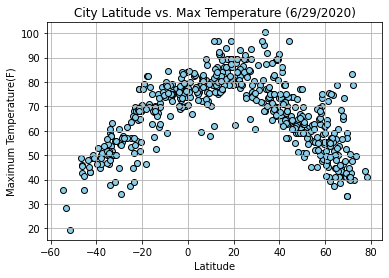

In [17]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Max Temp'], marker='o', facecolors="skyblue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (6/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature(F)")
plt.grid()
plt.savefig("output_data/figure_1.png")
plt.show()



## Latitude vs. Humidity Plot

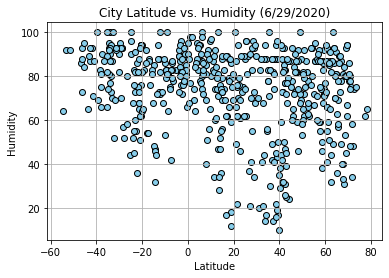

In [18]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Humidity'], marker='o', facecolors="skyblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (6/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_data/figure_2.png")
plt.show()

## Latitude vs. Cloudiness Plot

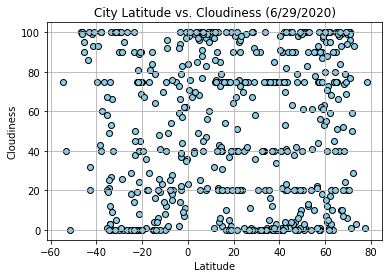

In [19]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Cloudiness'], marker='o', facecolors="skyblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (6/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/figure_3.png")
plt.show()

## Latitude vs. Wind Speed Plot

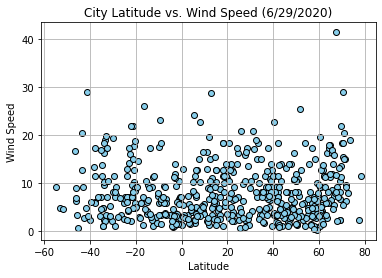

In [20]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Wind Speed'], marker='o', facecolors="skyblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (6/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/figure_4.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern and Southern Hemisphere DataFrames
def H(row):
    if row['Lat'] > 0:
        value = "Northern"
    elif row['Lat'] < 0:
        value = "Southern"
    return value

weather_data_df["Hemisphere"] = weather_data_df.apply(H, axis=1)
weather_data_df.head()

weather_datanorth_df = weather_data_df.loc[(weather_data_df["Hemisphere"] == "Northern")]
weather_datasouth_df = weather_data_df.loc[(weather_data_df["Hemisphere"] == "Southern")]
weather_datasouth_df
                                    

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
City_ID,,,,,,,,,,
3,Ushuaia,-54.80,-68.30,35.60,64,75,9.17,AR,1593470676,Southern
6,Rikitea,-23.12,-134.97,68.27,60,38,14.12,PF,1593470677,Southern
8,Nyimba,-14.56,30.81,70.34,47,64,9.46,ZM,1593470677,Southern
13,Bluff,-46.60,168.33,48.85,86,100,16.71,NZ,1593470677,Southern
14,Touros,-5.20,-35.46,77.00,83,75,3.36,BR,1593470678,Southern
...,...,...,...,...,...,...,...,...,...,...
546,Barabai,-2.58,115.38,73.31,88,57,1.30,ID,1593470740,Southern
548,Daru,-9.08,143.21,78.24,81,96,18.25,PG,1593470740,Southern
550,Zamora,-4.07,-78.96,70.20,73,73,2.06,EC,1593470741,Southern


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.562346740886383


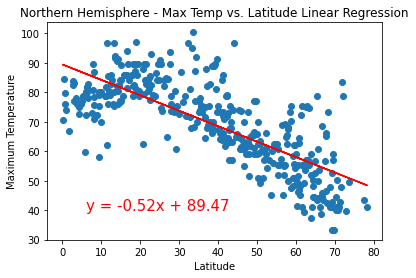

In [22]:
x_values = weather_datanorth_df['Lat']
y_values = weather_datanorth_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7212167130993542


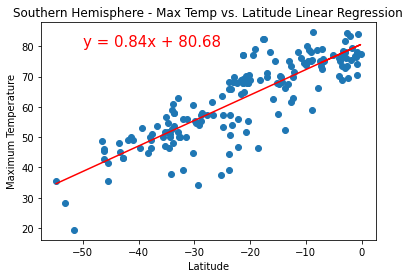

In [23]:
x_values = weather_datasouth_df['Lat']
y_values = weather_datasouth_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0033736237536871445


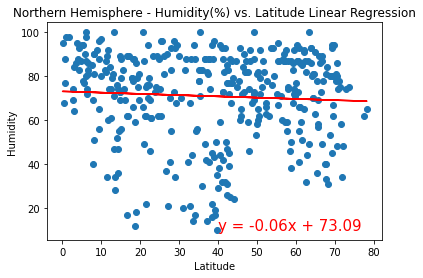

In [24]:
x_values = weather_datanorth_df['Lat']
y_values = weather_datanorth_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00876641776050322


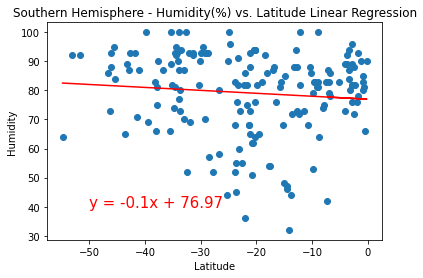

In [26]:
x_values = weather_datasouth_df['Lat']
y_values = weather_datasouth_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004286729055654643


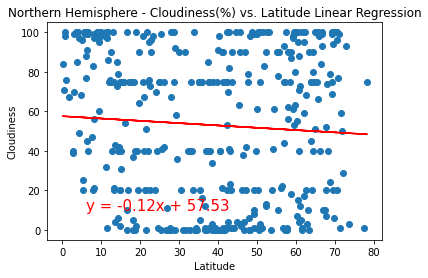

In [27]:
x_values = weather_datanorth_df['Lat']
y_values = weather_datanorth_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029453198327688907


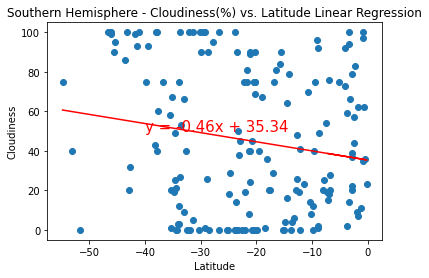

In [28]:
x_values = weather_datasouth_df['Lat']
y_values = weather_datasouth_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010342255744965055


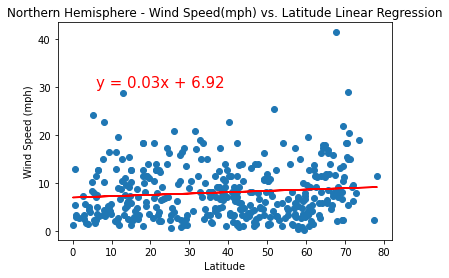

In [31]:
x_values = weather_datanorth_df['Lat']
y_values = weather_datanorth_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028605197353537833


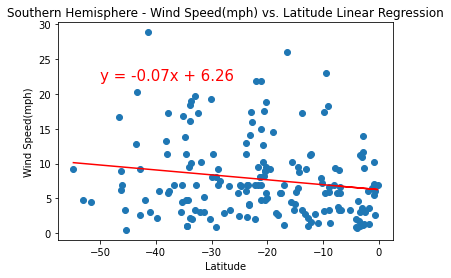

In [32]:
x_values = weather_datasouth_df['Lat']
y_values = weather_datasouth_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()